# North Carolina - Analysis

## Required Packages

In [142]:
# For working with graphs
import networkx as nx
# For making plots
import matplotlib.pyplot as plt
import numpy as np

# Needed for gerrchain
import gerrychain   
from gerrychain import Graph, Partition, proposals, updaters, constraints, accept, MarkovChain, GeographicPartition
from gerrychain.updaters import cut_edges, Tally
from gerrychain.tree import recursive_tree_part
from gerrychain.proposals import recom
from gerrychain.accept import always_accept
from functools import partial
import geopandas as gpd
import pandas as pd

# To fix any data issues
import maup
from maup import smart_repair

## Import the File and Use Maup to Repair

In [143]:
nc_gdf = gpd.read_file("NorthCarolina_precincts_with_data/NorthCarolina_precincts_with_data.shp")

In [144]:
# Check for any invalid geometries.
maup.doctor(nc_gdf)

KeyboardInterrupt: 

In [111]:
# Repair invalid geometries using buffer.
nc_gdf.loc[~nc_gdf['geometry'].is_valid, 'geometry'] = nc_gdf.loc[~nc_gdf['geometry'].is_valid, 'geometry'].buffer(0)

In [124]:
# Check geodataframe using maup's doctor function
maup.doctor(nc_gdf)

KeyboardInterrupt: 

In [145]:
# Use Smart Repair to remove the holes.
nc_gdf = smart_repair(nc_gdf)

/opt/anaconda3/envs/Math195/lib/python3.12/site-packages/maup/smart_repair.py:95: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  geometries_df["geometry"][i] = shapely.wkb.loads(
/opt/anaconda3/envs/Math195/lib/python3.12/site-packages/maup/s

Snapping all geometries to a grid with precision 10^( -4 ) to avoid GEOS errors.


/opt/anaconda3/envs/Math195/lib/python3.12/site-packages/maup/smart_repair.py:372: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  pieces_df["polygon indices"][i] = set()


Identifying overlaps...


/opt/anaconda3/envs/Math195/lib/python3.12/site-packages/maup/smart_repair.py:415: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  pieces_df["polygon indices"][i] = pieces_df["polygon indices"][i].union({j})


Resolving overlaps...


/opt/anaconda3/envs/Math195/lib/python3.12/site-packages/maup/smart_repair.py:487: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  geometries_df["geometry"][this_poly_ind] = unary_union([geometries_df["geometry"][this_poly_ind], this_piece])
/

Assigning order 2 pieces...
Assigning order 3 pieces...
Filling gaps...


Gaps to simplify:   0%|          | 0/13 [00:00<?, ?it/s]/opt/anaconda3/envs/Math195/lib/python3.12/site-packages/maup/smart_repair.py:1207: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  holes_df.geometry[h_ind] = orient(holes_df.geometry[h_i

In [114]:
# Confirm that everything is fixed. 
maup.doctor(nc_gdf)

True

In [146]:
# Change some of the column names to standardize.
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)

nc_gdf.rename(columns = {'OriginalPl': "Original_CD", "TempPlan": "Temp_CD", "RevisedPla": "Adopted_CD", "P1_001N": "Total Population", "P1_002N": "1RPop", "P1_003N": "WPOP", "P1_004N": "BPOP", "P1_005N": "NPOP", "P1_006N": "APOP", "P1_007N": "PIPOP", "P1_008N": "Other"}, inplace=True)

print(nc_gdf.columns)

Index(['UNIQUE_ID', 'COUNTYFP', 'COUNTYNM', 'PRECINCT', 'G22USSDBEA',
       'G22USSRBUD', 'Original_CD', 'Temp_CD', 'Adopted_CD',
       'Total Population', '1RPop', 'WPOP', 'BPOP', 'NPOP', 'APOP', 'PIPOP',
       'Other', 'geometry'],
      dtype='object')


In [147]:
nc_gdf

,UNIQUE_ID,COUNTYFP,COUNTYNM,PRECINCT,G22USSDBEA,G22USSRBUD,Original_CD,Temp_CD,Adopted_CD,Total Population,1RPop,WPOP,BPOP,NPOP,APOP,PIPOP,Other,geometry
0,BURKE---0001,23,BURKE,0001,437,1081,1,1,5,4615.0,4372.0,3726.0,220.0,48.0,260.0,1.0,117.0,"POLYGON ((1233595.464 737538.312, 1233589.172 ..."
1,STANLY---0003,167,STANLY,0003,503,646,13,12,12,3062.0,2872.0,2319.0,439.0,14.0,31.0,1.0,68.0,"POLYGON ((1644857.853 584760.831, 1644768.728 ..."
2,BURKE---0003,23,BURKE,0003,129,492,1,1,5,1684.0,1612.0,1438.0,41.0,9.0,66.0,8.0,50.0,"POLYGON ((1233491.995 737132.470, 1233521.026 ..."
3,STANLY---0007,167,STANLY,0007,379,709,13,12,12,3354.0,3161.0,2297.0,606.0,8.0,155.0,0.0,95.0,"POLYGON ((1651211.156 594335.458, 1651345.700 ..."
4,STANLY---0008,167,STANLY,0008,478,79,13,12,12,2695.0,2567.0,601.0,1824.0,17.0,34.0,0.0,91.0,"POLYGON ((1644768.728 584714.220, 1644857.853 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2650,ORANGE---WESTWOOD,135,ORANGE,WESTWOOD,1358,97,8,8,8,3999.0,3698.0,2682.0,441.0,40.0,395.0,0.0,140.0,"POLYGON ((1978048.713 780066.119, 1977669.069 ..."
2651,ALEXANDER---W,3,ALEXANDER,W,207,920,1,1,9,2242.0,2132.0,2036.0,23.0,6.0,27.0,0.0,40.0,"POLYGON ((1332682.964 759131.465, 1332600.443 ..."
2652,LENOIR---W,107,LENOIR,W,93,544,7,7,0,1617.0,1532.0,1356.0,96.0,4.0,1.0,1.0,74.0,"POLYGON ((2424172.874 536662.233, 2424197.422 ..."
2653,HAYWOOD---WAYNESVILLE WEST,87,HAYWOOD,WAYNESVILLE WEST,379,504,2,2,2,2357.0,2246.0,2151.0,29.0,6.0,16.0,0.0,44.0,"POLYGON ((813612.709 670185.643, 813591.854 67..."


In [139]:

# True/False for each row if 'Hispanic Population' is null
na_values = nc_gdf["Total Population"].isna()

# We have only one column with Na values,  so I hard coded it
changed_nc_gdf = nc_gdf[na_values]
changed_nc_gdf["Total Population"] = 99 + 26

# Replace each of the columns
changed_nc_gdf["WPOP"] = 0
changed_nc_gdf["BPOP"] = 0
changed_nc_gdf["NPOP"] = 0
changed_nc_gdf["APOP"] = 0
changed_nc_gdf["PIPOP"] = 0
changed_nc_gdf["1RPop"] = 0
changed_nc_gdf["Other"] = 0

nc_gdf.iloc[90] = changed_nc_gdf

# Replace NaN values with 0
nc_gdf.fillna(0, inplace=True)

# True/False for each row if 'Total Population Population' is null
na_values = nc_gdf["Total Population"].isna()
#nc_gdf[na_values]



# changed_nc_gdf["WPOP"] = changed_nc_gdf["1Rpop"].fillna(0)
# nc_gdf['Total Population']= (df['G22USSDBEA']+ df['G22USSRBUD']).fillna(df[['M2','M1']].sum(1))



In [150]:
# Drop row with index label 1
nc_gdf = nc_gdf.drop(90)

In [151]:
nc_graph = Graph.from_geodataframe(nc_gdf, ignore_errors = True)

## What do the Current Maps Look Like?

### Original CD Plan

<Axes: >

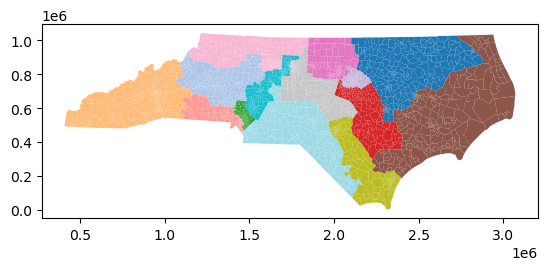

In [152]:
# Draw the map of the districting plan
nc_gdf.plot(column = "Original_CD", cmap='tab20')

### Temporary CD Plan

<Axes: >

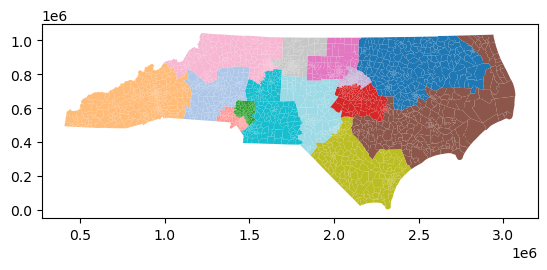

In [153]:
nc_gdf.plot(column = "Temp_CD", cmap = 'tab20')

### Adopted CD Plan

<Axes: >

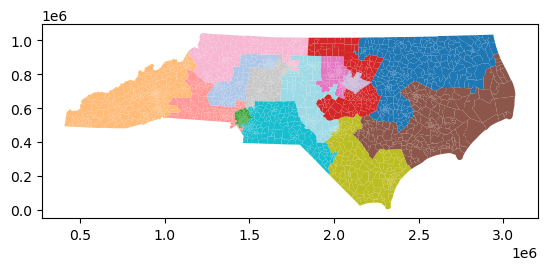

In [154]:
nc_gdf.plot(column = "Adopted_CD", cmap='tab20')

### Current Population Maps

<Axes: >

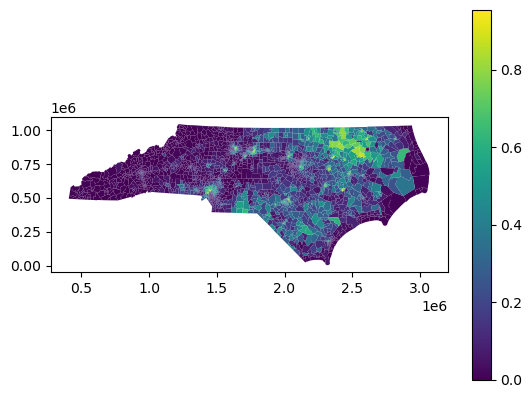

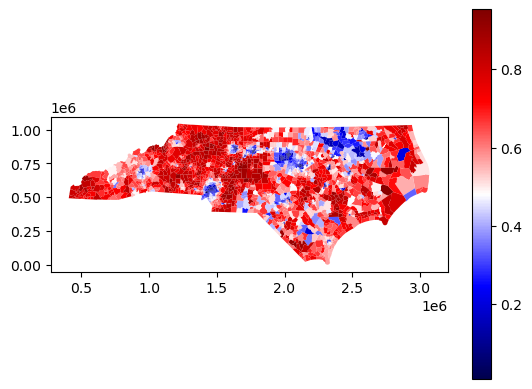

In [155]:
# Plot the black population percentage by precincts
nc_gdf['b_frac'] = pd.to_numeric(nc_gdf['BPOP'])/pd.to_numeric(nc_gdf['Total Population'])
nc_gdf.plot(column = 'b_frac', missing_kwds = {"color": "grey"}, legend=True)

# Plot the Presidential republican votes by precincts
nc_gdf['pref_party'] = pd.to_numeric(nc_gdf['G22USSRBUD'])/pd.to_numeric(nc_gdf['G22USSRBUD'] + nc_gdf['G22USSDBEA'])
nc_gdf.plot(column = 'pref_party', missing_kwds = {"color": "grey"}, legend=True, cmap = 'seismic')



## Getting Ready for the Ensemble Analysis

In [159]:


# Get the information at the Nodes
print("Information at Nodes: ", nc_graph.nodes()[0].keys())
tot_pop = np.sum([nc_graph.nodes()[v]['Total Population'] for v in nc_graph.nodes()])
print("Total Population: ", tot_pop)


Information at Nodes:  dict_keys(['boundary_node', 'area', 'UNIQUE_ID', 'COUNTYFP', 'COUNTYNM', 'PRECINCT', 'G22USSDBEA', 'G22USSRBUD', 'Original_CD', 'Temp_CD', 'Adopted_CD', 'Total Population', '1RPop', 'WPOP', 'BPOP', 'NPOP', 'APOP', 'PIPOP', 'Other', 'geometry'])
Total Population:  10439388.0


In [160]:
nc_gdf["Total Population"]

sum = nc_gdf["Total Population"].sum()

print(sum)

10439388.0


In [172]:
num_dist = 14 # Number of Congressional Districts in Arkansas
ideal_pop = tot_pop/num_dist #tot_pop is calculated in the previous cell
pop_tolerance = 0.02 #how much variance we want in the population of each district
initial_plan = recursive_tree_part(nc_graph, range(num_dist), ideal_pop, 'Total Population', pop_tolerance, 10) #use recursive tree part to create an initial plan


## Ensemble Analysis

### From the Original Plan

In [173]:
plan_init = GeographicPartition(nc_graph, assignment="Original_CD")

In [174]:
print(plan_init)

<GeographicPartition [14 parts]>


In [175]:
# create the initial partition
initial_partition = Partition(
    nc_graph,
    assignment = plan_init.assignment,
    updaters = 
    {   "cut edges": cut_edges ,
        "district population": Tally("Total Population", alias = "district population"),
        "district BPOP": Tally("BPOP", alias = "district BPOP"),
        "R Votes": Tally("G22USSRBUD", alias = "R Votes"), 
        "D Votes": Tally("G22USSDBEA", alias = "D Votes"),
    }
)

In [176]:
# How many democratic districts does our initial plan have?
d = 0
for i in range(num_dist): 
    if initial_partition["R Votes"][i] < initial_partition["D Votes"][i]:
        d += 1

print("Number of Democratic Districts: ", d)


Number of Democratic Districts:  3


In [177]:
# how to take a step
rw_proposal = partial(recom, ## how you choose a next districting plan
                      pop_col = "Total Population", ## What data describes population? 
                      pop_target = ideal_pop, ## What the target/ideal population is for each district 
                                              ## (we calculated ideal pop above)
                      epsilon = pop_tolerance,  ## how far from ideal population you can deviate
                                              ## (we set pop_tolerance above)
                      node_repeats = 1 ## number of times to repeat bipartition.  Can increase if you get a BipartitionWarning
                      )

In [178]:
# We need to ensure that there is a population constraint
population_constraint = constraints.within_percent_of_ideal_population(
    initial_partition, 
    pop_tolerance, 
    pop_key = "district population"
    )

In [188]:
# This will set up the walk, but not actually run it.
nc_random_walk = MarkovChain(
    proposal = rw_proposal, 
    constraints = [population_constraint],
    accept = always_accept, # accepts every proposed plan that meets population criteria
    initial_state = initial_partition, 
    total_steps = 10000
)

In [189]:
# Now run it!
cutedge_ensemble = []
bmaj_ensemble = []
d_ensemble = [] 

for part in nc_random_walk:
    # Add cutedges to cutedges ensemble
    cutedge_ensemble.append(len(part["cut edges"]))
    
    # Calculate number of Districts with at least 10 BPOP%
    # Add to ensemble
    num_maj_black = 0
    for i in range(num_dist):
        b_perc = part["district BPOP"][i]/part["district population"][i]
        if b_perc >= 0.3: 
            num_maj_black = num_maj_black + 1
    bmaj_ensemble.append(num_maj_black)

    # Calculate number of districts with more Democratic votes than Republican votes
    d = 0
    for i in range(num_dist):
        if part["R Votes"][i] < part["D Votes"][i]: 
            d = d + 1
    d_ensemble.append(d)
    
print(cutedge_ensemble)
print(bmaj_ensemble)
print(d_ensemble)

[621, 617, 604, 604, 619, 635, 628, 629, 648, 669, 669, 677, 657, 653, 652, 668, 660, 661, 713, 703, 677, 672, 715, 664, 686, 701, 694, 698, 703, 704, 683, 678, 687, 694, 694, 731, 715, 719, 698, 696, 684, 676, 672, 665, 697, 672, 670, 666, 683, 690, 690, 683, 690, 690, 698, 706, 709, 712, 699, 747, 764, 770, 776, 785, 784, 787, 773, 756, 752, 758, 741, 721, 738, 774, 771, 779, 771, 762, 755, 738, 707, 671, 672, 672, 669, 661, 669, 705, 719, 711, 711, 723, 676, 707, 664, 713, 711, 721, 733, 730, 734, 730, 734, 723, 708, 669, 658, 669, 668, 676, 678, 679, 670, 665, 665, 685, 685, 691, 685, 689, 694, 698, 709, 712, 720, 711, 732, 711, 697, 697, 715, 716, 754, 723, 726, 730, 732, 719, 726, 706, 726, 715, 716, 727, 706, 728, 732, 734, 726, 712, 720, 744, 736, 727, 761, 754, 743, 732, 734, 746, 754, 743, 743, 741, 737, 742, 746, 752, 783, 787, 791, 796, 802, 800, 787, 778, 778, 775, 781, 774, 770, 791, 768, 783, 807, 775, 775, 785, 783, 779, 773, 777, 768, 758, 732, 723, 724, 727, 730, 760,

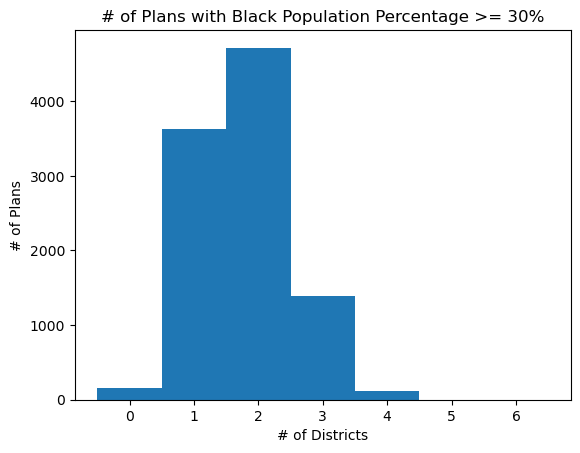

In [191]:
plt.figure()
plt.hist(bmaj_ensemble, align = 'left', bins = [0,1,2,3,4,5,6,7])
plt.title("# of Plans with Black Population Percentage >= 30%")
plt.xlabel("# of Districts")
plt.ylabel("# of Plans")
plt.show()

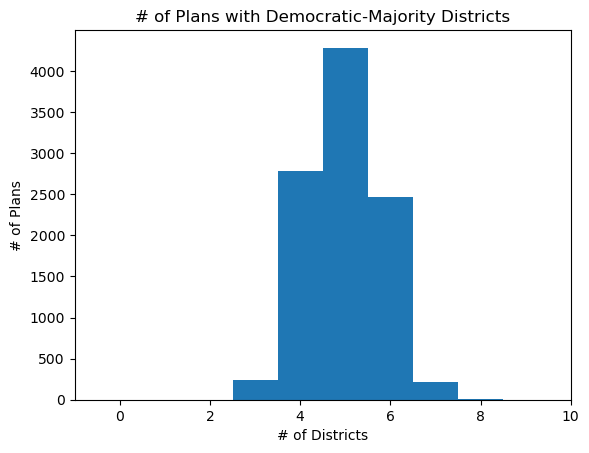

In [192]:
# Number of Democratic Districts
plt.figure()
plt.hist(d_ensemble, align = 'left', bins = [0,1,2,3,4,5,6,7,8,9,10])
plt.title("# of Plans with Democratic-Majority Districts")
plt.xlabel("# of Districts")
plt.ylabel("# of Plans")
plt.show()

In [193]:
dmaj = [] 

for current_plan in nc_random_walk: 
    dperc_this_step = []
    for i in range(num_dist):
        d_perc = current_plan["D Votes"][i]/ (current_plan["D Votes"][i]+current_plan["R Votes"][i])
        dperc_this_step.append(d_perc)
    dperc_this_step.sort()
    dmaj.append(dperc_this_step)

plt.figure()
plt.boxplot(c)
plt.show()


## ORIGINAL PLAN
#Calculate District Democratic Majority
dist_dmaj = [0] * num_dist
dist_votes = [0] * num_dist
dist_frac_d = [0] * num_dist

for v in nc_graph.nodes(): 
    dist = int(nc_graph.nodes()[v]["Original_CD"])-1 # Because districts are indesed starting at 1, not 0
    dist_dmaj[dist] = dist_dmaj[dist] + ma_graph.nodes()[v]["PRES16D"]
    dist_votes[dist] = dist_votes[dist] + (ma_graph.nodes()[v]["PRES16D"] + ma_graph.nodes()[v]["PRES16R"])

# Calculate Democratic Fraction for each district, sort it
dist_frac_d = [dist_dmaj[i]/dist_votes[i] for i in range(num_dist)]
dist_frac_d.sort()
print(dist_frac_d)

# plot points on top of boxplot
plt.figure()
plt.boxplot(c)
plt.scatter(x = range(1, num_dist + 1), y = dist_frac_d, color = "red" )
plt.title("Democrat Vote Share by District")
plt.xlabel("District #")
plt.ylabel("Democratic Vote Share")
plt.show()

NameError: name 'c' is not defined

<Figure size 640x480 with 0 Axes>

[0.2760193381099106, 0.3576337426245245, 0.3590889689841601, 0.40544979919678714, 0.42434743037889694, 0.4580639248626886, 0.48514544533418025, 0.4871038260117551, 0.48888916652090986, 0.4916757932803622, 0.4987045240170501, 0.6623755972375805, 0.6762176910563508, 0.6843095561182378]
[0.28809057443581515, 0.30964006211420053, 0.3444129431912226, 0.38138949808195866, 0.42873266283765143, 0.44645877169477305, 0.4588242373568461, 0.5025339933135654, 0.5075414808925948, 0.5402876989983667, 0.5797275355431468, 0.636354540451794, 0.6498235782482358, 0.6853754140532012]


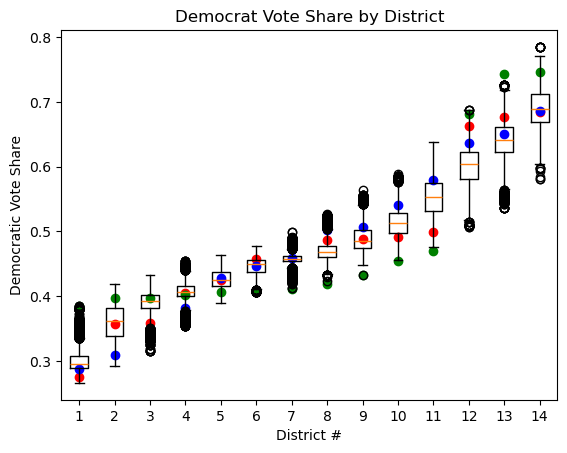

In [202]:
c = np.array(dmaj)

## ORIGINAL PLAN
#Calculate District Democratic Majority
dist_dmaj = [0] * num_dist
dist_votes = [0] * num_dist
dist_frac_d = [0] * num_dist

for v in nc_graph.nodes(): 
    dist = int(nc_graph.nodes()[v]["Original_CD"])-1 # Because districts are indesed starting at 1, not 0
    dist_dmaj[dist] = dist_dmaj[dist] + nc_graph.nodes()[v]["G22USSDBEA"]
    dist_votes[dist] = dist_votes[dist] + (nc_graph.nodes()[v]["G22USSDBEA"] + nc_graph.nodes()[v]["G22USSRBUD"])

# Calculate Democratic Fraction for each district, sort it
dist_frac_d = [dist_dmaj[i]/dist_votes[i] for i in range(num_dist)]
dist_frac_d.sort()
print(dist_frac_d)

## TEMPORARY PLAN
#Calculate District Democratic Majority
dist_dmaj_temp = [0] * num_dist
dist_votes_temp = [0] * num_dist
dist_frac_d_temp = [0] * num_dist

for v in nc_graph.nodes(): 
    dist = int(nc_graph.nodes()[v]["Temp_CD"])-1 # Because districts are indesed starting at 1, not 0
    dist_dmaj_temp[dist] = dist_dmaj_temp[dist] + nc_graph.nodes()[v]["G22USSDBEA"]
    dist_votes_temp[dist] = dist_votes_temp[dist] + (nc_graph.nodes()[v]["G22USSDBEA"] + nc_graph.nodes()[v]["G22USSRBUD"])

# Calculate Democratic Fraction for each district, sort it
dist_frac_d_temp = [dist_dmaj_temp[i]/dist_votes_temp[i] for i in range(num_dist)]
dist_frac_d_temp.sort()
print(dist_frac_d_temp)


## ADOPTED PLAN
#Calculate District Democratic Majority
dist_dmaj_adopt = [0] * num_dist
dist_votes_adopt = [0] * num_dist
dist_frac_d_adopt = [0] * num_dist

for v in nc_graph.nodes(): 
    dist = int(nc_graph.nodes()[v]["Adopted_CD"])-1 # Because districts are indesed starting at 1, not 0
    dist_dmaj_adopt[dist] = dist_dmaj_adopt[dist] + nc_graph.nodes()[v]["G22USSDBEA"]
    dist_votes_adopt[dist] = dist_votes_adopt[dist] + (nc_graph.nodes()[v]["G22USSDBEA"] + nc_graph.nodes()[v]["G22USSRBUD"])

# Calculate Democratic Fraction for each district, sort it
dist_frac_d_adopt = [dist_dmaj_adopt[i]/dist_votes_adopt[i] for i in range(num_dist)]
dist_frac_d_adopt.sort()

# plot points on top of boxplot
plt.figure()
plt.scatter(x = range(1, num_dist + 1), y = dist_frac_d, color = "red" )
plt.scatter(x = range(1, num_dist + 1), y = dist_frac_d_temp, color = "blue" )
plt.scatter(x = range(1, num_dist + 1), y = dist_frac_d_adopt, color = "green")

# Plot it finally!
plt.boxplot(c)
plt.title("Democrat Vote Share by District")
plt.xlabel("District #")
plt.ylabel("Democratic Vote Share")
plt.show()

## So how would 2024 Change?

In [224]:
# Read in our original, temp, and adopted congressional district gdp for district boundaries
nc_init_gdf = gpd.read_file("SL 2022-3 Congress - Shapefile/SL 2022-3.shp")
nc_temp_gdf = gpd.read_file("2022 Interim Congressional - Shapefile/Interim Congressional.shp")
nc_adopt_gdf = gpd.read_file("SL 2023-145 Congress - Shapefile/SL 2023-145.shp")

### Original Plan (never used)

In [207]:
# Group by congressional district and calculate total votes for each candidate
district_init_totals = nc_gdf.groupby('Original_CD')[['G22USSRBUD', 'G22USSDBEA']].sum()

# Determine the winning party in each district
district_init_totals['Winner-Orig'] = np.where(district_init_totals['G22USSDBEA'] > district_init_totals['G22USSRBUD'], "Democrat", "Republican")

# Reset index to turn District back into a column (optional)
district_init_totals = district_init_totals.reset_index()

print(district_init_totals)

    Original_CD  G22USSRBUD  G22USSDBEA Winner-Orig
0             0      125955      125304  Republican
1             1      195726       74621  Republican
2             2      171487      144947  Republican
3             3       75236      157130    Democrat
4             4      138314      133784  Republican
..          ...         ...         ...         ...
9             9      154329      113765  Republican
10           10      128103      121661  Republican
11           11      136178      128320  Republican
12           12      148043      100957  Republican
13           13      159928       89039  Republican

[14 rows x 4 columns]


In [ ]:
# Count the number of districts won by each party
winner_summary_orig = district_init_totals['Winner-Orig'].value_counts()

print(winner_summary_orig)

Winner-Orig
Republican    11
Democrat       3
Name: count, dtype: int64


In [209]:
nc_gdf = nc_gdf.merge(district_init_totals[["Original_CD", "Winner-Orig"]], on='Original_CD', how='left')


EPSG:2264
EPSG:2264


<Axes: >

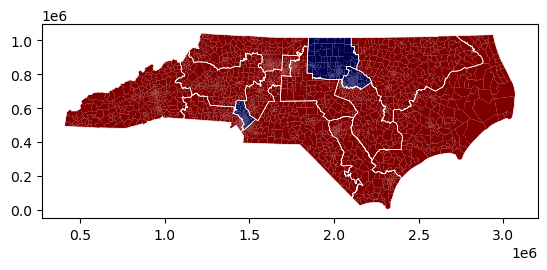

In [217]:
fig, ax = plt.subplots()

# Plot the units with the vote percentage as color
nc_gdf.plot(column = "Winner-Orig", ax=ax, cmap = "seismic")

print(nc_init_gdf.crs)
print(nc_gdf.crs)
nc_init_gdf = nc_init_gdf.to_crs("EPSG:2264")

# Overlay districts
nc_init_gdf.boundary.plot(ax=ax, color='white', linewidth=0.5)

### Temp Plan

In [225]:
# Group by congressional district and calculate total votes for each candidate
district_temp_totals = nc_gdf.groupby('Temp_CD')[['G22USSRBUD', 'G22USSDBEA']].sum()

# Determine the winning party in each district
district_temp_totals['Winner-Temp'] = np.where(district_temp_totals['G22USSDBEA'] > district_temp_totals['G22USSRBUD'], "Democrat", "Republican")

# Reset index to turn District back into a column (optional)
district_temp_totals = district_temp_totals.reset_index()

print(district_temp_totals)

    Temp_CD  G22USSRBUD  G22USSDBEA Winner-Temp
0         0      126330      127617    Democrat
1         1      186815       75599  Republican
2         2      170873      144871  Republican
3         3       79958      139921    Democrat
4         4      134420      138537    Democrat
..      ...         ...         ...         ...
9         9      168679      103995  Republican
10       10      116806      137279    Democrat
11       11      159439      119658  Republican
12       12      178719       80159  Republican
13       13      126012      101635  Republican

[14 rows x 4 columns]


In [229]:
# Count the number of districts won by each party
winner_summary_temp = district_temp_totals['Winner-Temp'].value_counts()

print(winner_summary_temp)

Winner-Temp
Democrat      7
Republican    7
Name: count, dtype: int64


In [230]:
nc_gdf = nc_gdf.merge(district_temp_totals[["Temp_CD", "Winner-Temp"]], on='Temp_CD', how='left')


EPSG:32119
EPSG:2264


<Axes: >

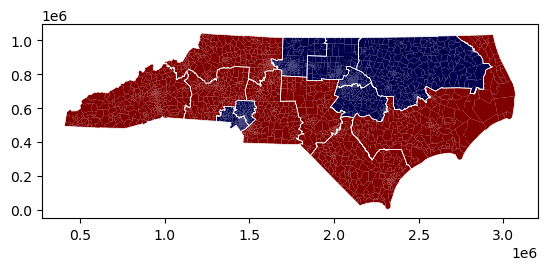

In [231]:
fig, ax = plt.subplots()

# Plot the units with the vote percentage as color
nc_gdf.plot(column = "Winner-Temp", ax=ax, cmap = "seismic")

print(nc_init_gdf.crs)
print(nc_gdf.crs)
nc_temp_gdf = nc_temp_gdf.to_crs("EPSG:2264")

# Overlay districts
nc_temp_gdf.boundary.plot(ax=ax, color='white', linewidth=0.5)

## Adopted Plan

In [232]:
# Group by congressional district and calculate total votes for each candidate
district_adopt_totals = nc_gdf.groupby('Adopted_CD')[['G22USSRBUD', 'G22USSDBEA']].sum()

# Determine the winning party in each district
district_adopt_totals['Winner-Adopted'] = np.where(district_adopt_totals['G22USSDBEA'] > district_adopt_totals['G22USSRBUD'], "Democrat", "Republican")

# Reset index to turn District back into a column (optional)
district_adopt_totals = district_adopt_totals.reset_index()

print(district_adopt_totals)

    Adopted_CD  G22USSRBUD  G22USSDBEA Winner-Adopted
0            0      133197      118128     Republican
1            1      157911      106127     Republican
2            2      171160      142799     Republican
3            3       52633      154675       Democrat
4            4      156933      109904     Republican
..         ...         ...         ...            ...
9            9      158168      108062     Republican
10          10      147149       97299     Republican
11          11      161491      123526     Republican
12          12      157632      103609     Republican
13          13      143292       98647     Republican

[14 rows x 4 columns]


In [235]:
# Count the number of districts won by each party
winner_summary_adopt = district_adopt_totals['Winner-Adopted'].value_counts()

print(winner_summary_adopt)

Winner-Adopted
Republican    11
Democrat       3
Name: count, dtype: int64


In [236]:
nc_gdf = nc_gdf.merge(district_adopt_totals[["Adopted_CD", "Winner-Adopted"]], on='Adopted_CD', how='left')


EPSG:2264


<Axes: >

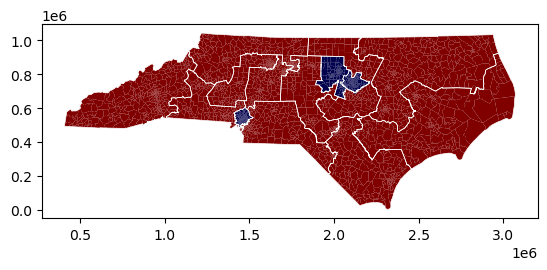

In [238]:
fig, ax = plt.subplots()

# Plot the units with the vote percentage as color
nc_gdf.plot(column = "Winner-Adopted", ax=ax, cmap = "seismic")

print(nc_gdf.crs)
nc_adopt_gdf = nc_adopt_gdf.to_crs("EPSG:2264")

# Overlay districts
nc_adopt_gdf.boundary.plot(ax=ax, color='white', linewidth=0.5)